                              **INTRODUCTION** 
In this project we have given which is based on the Statlog dataset.we have given certain variables like
1:Age
2:Saving accounts
3:checking account
4: Housing
5:credit amount
6:Durtion
7:purpose
we have to perform basic data exploration and get the deep insights from it by performing univariate,multivariate and bivariate analysis.

In [ ]:
# importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from scipy import stats

In [ ]:
# Reading the file
df=pd.read_csv("german_Credit.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
filt=(df['Job']==3) & (df['Sex']=='Male')


In [ ]:
df=df[(df.Age==67) & (df.Job==2) & (df.Sex=='Male') & (df.Housing=='own')]
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose


In [ ]:
df=df.loc[(df['Job']==2) & (df['Sex']=='Male') & (df['Housing']=='own') & (df['Age']==38)]
len(df)

0

In [ ]:
# getting information about mean,median,quartiles of the specific columns
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [ ]:
#getting first 5 rows
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
# getting total number of rows and columns in the given data set
df.shape

(1000, 10)

In [ ]:
# getting information about dataset that how many total values are there and in which column we have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [ ]:
# return true if we have null values else return false
df.isnull()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [ ]:
# give total number of null values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
# Finding the unique value of saving account
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
# Finding the unique value of checking account
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
# Filling the null value of saving account
df['Saving accounts']=df['Saving accounts'].fillna(value="no saving")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,no saving,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
# filling the null value of checking account
df['Checking account']=df['Checking account'].fillna(value="no checking")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,no saving,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,no checking,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,no checking,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,no checking,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
# Now finding whether we have left with any null values or not
df.isnull().any()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
dtype: bool

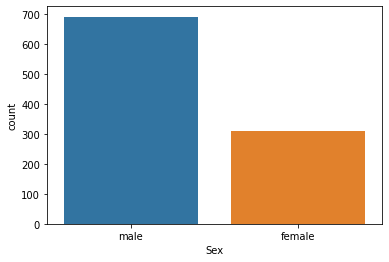

In [ ]:
sns.countplot(x="Sex",data=df)

we have more no.of mles than female in the given data set.

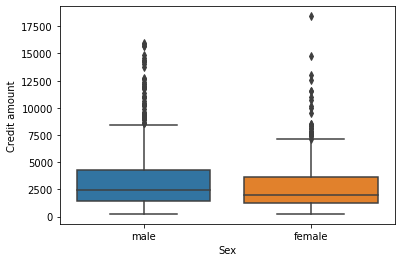

In [ ]:
sns.boxplot(x="Sex",y="Credit amount",data=df)

Median credit amount of male is more than female but at some instances female credit is more which is represented by outliers.

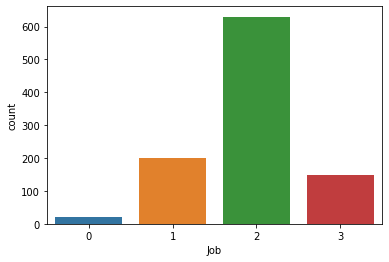

In [ ]:
sns.countplot(x='Job',data=df)

It is clear from the graph that most of the job are with skilled person.

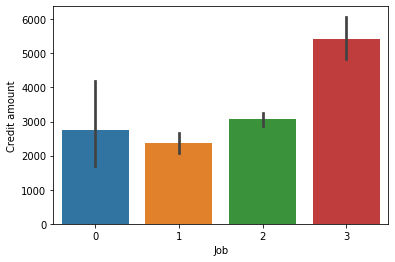

In [ ]:
sns.barplot(x='Job',y='Credit amount',data=df)

Most of the credit amount are with person having highly skilled job.

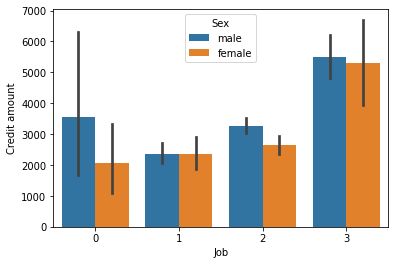

In [ ]:
sns.barplot(x='Job',y='Credit amount',hue='Sex',data=df)

credit amount of male with higly skilled job are more than female where as in the case of unskilled and non-resident both credit amount of male and female are same.

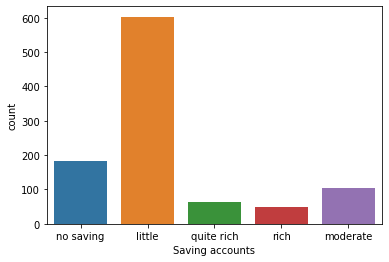

In [ ]:
sns.countplot(x='Saving accounts',data=df)

Person with little saving account are more in number.

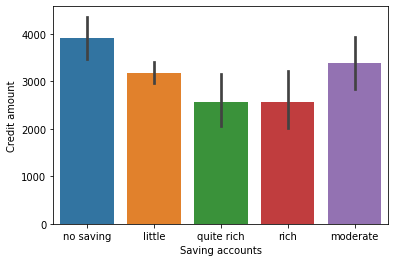

In [ ]:
sns.barplot(x="Saving accounts",y="Credit amount",data=df)

Person with no saving have more credit account in compare to others.

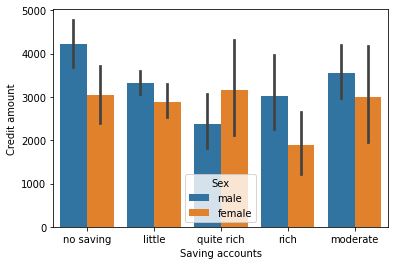

In [ ]:
sns.barplot(x="Saving accounts",y="Credit amount",hue='Sex',data=df)

In no saving account male have more credit amount as compare to female where as the quite rich saving account female have more credit amount than male.

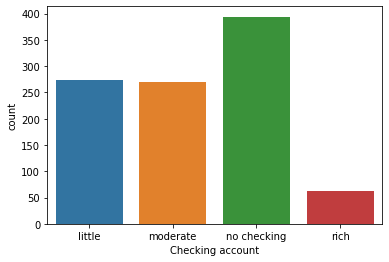

In [ ]:
sns.countplot(x='Checking account',data=df)

Person with no checking are more in number as compare to others.

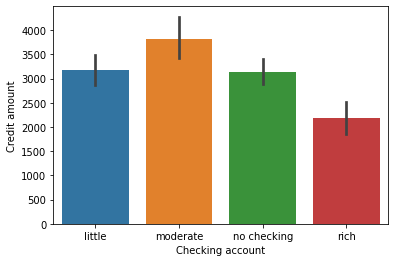

In [ ]:
sns.barplot(x='Checking account',y='Credit amount',data=df)

Person with moderate checking account have more credit amount.

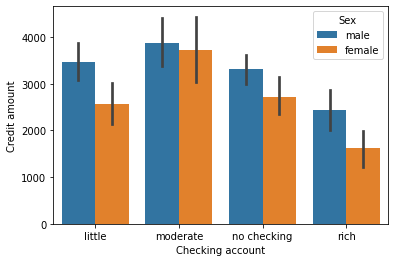

In [ ]:
sns.barplot(x='Checking account',y='Credit amount',hue='Sex',data=df)

In moderate checking account male have more credit amount than female where as in the case of rich male(particularly) and female both have less credit amount as compare to others.

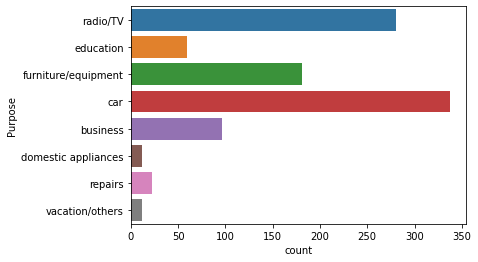

In [ ]:
sns.countplot(y='Purpose',data=df)

persons are spending for the car purpose more.

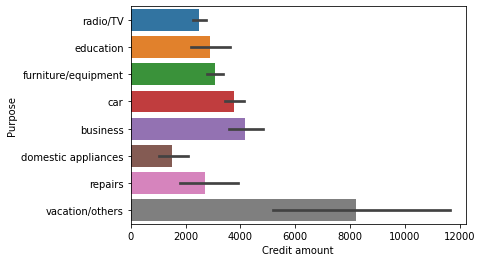

In [ ]:
sns.barplot(y='Purpose',x='Credit amount',data=df)

As it is clear from the Graph persons are taking credit amount to spend it more in the vaccations and for some other purpose.

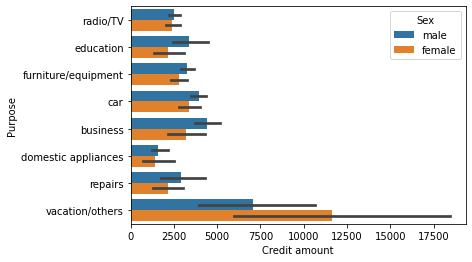

In [ ]:
sns.barplot(y='Purpose',x='Credit amount',hue='Sex',data=df)

In vaccation female are spending more credit amount than male where as seen in the case of domestic appliances credit amount spending is less specially female are spending less on it than male.

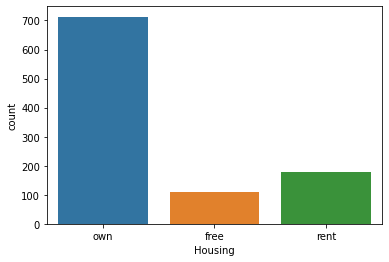

In [ ]:
sns.countplot(x='Housing',data=df)

People owing there own house in count are more than people who are living on rent or free housing.

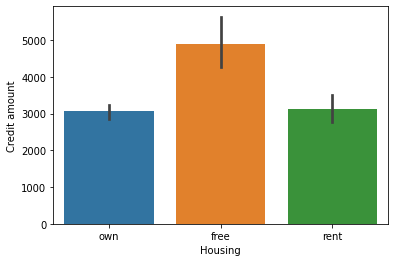

In [ ]:
sns.barplot(x='Housing',y='Credit amount',data=df)

Credit amount is taken more bt the people who are specially living in free housing.

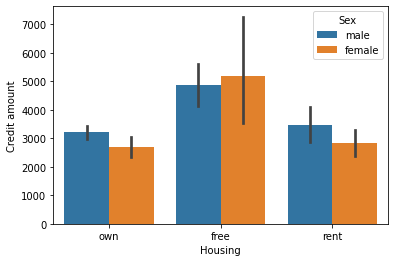

In [ ]:
sns.barplot(x='Housing',y='Credit amount',hue='Sex',data=df)

In case of free housing female take more credit amount where as in the case of own housing and rent housing male take more credit amount.

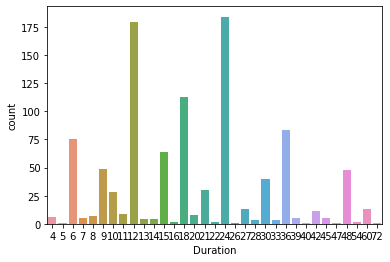

In [ ]:
sns.countplot(x='Duration',data=df)

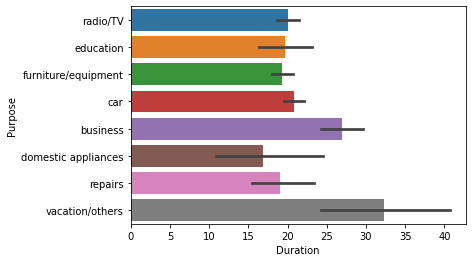

In [ ]:
sns.barplot(x="Duration",y='Purpose',data=df)

The duration is long for the vaccation purpose.

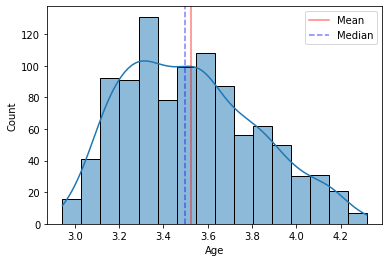

In [ ]:
sns.histplot(data = df['Age'], kde = True)
plt.axvline(x=df.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=df.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()


As it is positively skewed and the mean age is around 35 and median is around 33.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


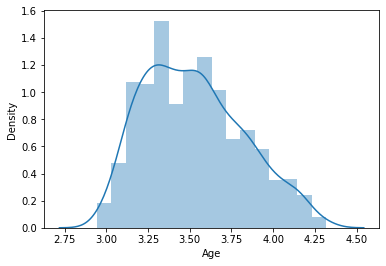

In [ ]:
sns.distplot(df['Age'])

we have perform the log tranformation to make the graph normally distributed.

In [ ]:
#as we are not provided by social status column so we are comparing person with more checking account have great social status.
df['Social status']=df['Checking account']
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Social status
0,0,67,male,2,own,no saving,little,1169,6,radio/TV,little
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,moderate
2,2,49,male,1,own,little,no checking,2096,12,education,no checking
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,little
4,4,53,male,2,free,little,little,4870,24,car,little
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,no checking,1736,12,furniture/equipment,no checking
996,996,40,male,3,own,little,little,3857,30,car,little
997,997,38,male,2,own,little,no checking,804,12,radio/TV,no checking
998,998,23,male,2,free,little,little,1845,45,radio/TV,little


In [ ]:
#filling null values
df['Social status']=df['Social status'].fillna(value="no checking")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Social status
0,0,67,male,2,own,no saving,little,1169,6,radio/TV,little
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,moderate
2,2,49,male,1,own,little,no checking,2096,12,education,no checking
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,little
4,4,53,male,2,free,little,little,4870,24,car,little
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,no checking,1736,12,furniture/equipment,no checking
996,996,40,male,3,own,little,little,3857,30,car,little
997,997,38,male,2,own,little,no checking,804,12,radio/TV,no checking
998,998,23,male,2,free,little,little,1845,45,radio/TV,little


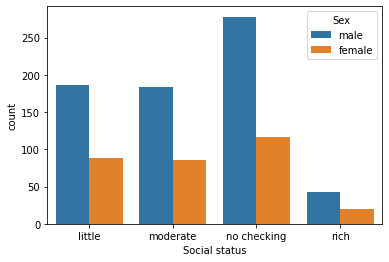

In [ ]:
sns.countplot(x='Social status',hue='Sex',data=df)

Person with no checking values are more in number.

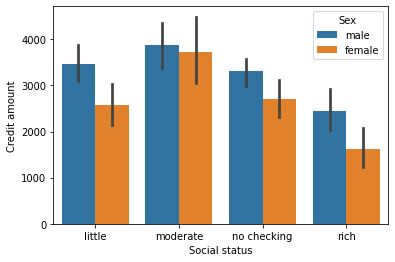

In [ ]:
sns.barplot(x="Social status",y="Credit amount",hue='Sex',data=df)

AS it is clear from the graph rich persons are having less credit amount means they have sufficient money and there social status is high.

           **Conclusion**
  In this project we have performed data explortion done cleaning of data deal with missing values and perform univariate,bivariate and multivariate analysis to get the proper insights from the provided data set.       
